In [117]:
import numpy as np
import pandas as pd
import os

# csv 파일 불러오기 

In [118]:
os.chdir(path='D:/Documents/StudyData/depression/schaefer100/filtered/')  

file_list = os.listdir(os.getcwd()) # 폴더 내의 파일 리스트를 읽어 file_list에 저장
file_list_csv = [file for file in file_list if file.endswith(".csv")]

In [119]:
file_list_csv

['YAD10004.schaefer100-yeo17_filtered.csv',
 'YAD10005.schaefer100-yeo17_filtered.csv',
 'YAD10006.schaefer100-yeo17_filtered.csv',
 'YAD10008.schaefer100-yeo17_filtered.csv',
 'YAD10009.schaefer100-yeo17_filtered.csv',
 'YAD10011.schaefer100-yeo17_filtered.csv',
 'YAD10014.schaefer100-yeo17_filtered.csv',
 'YAD10015.schaefer100-yeo17_filtered.csv',
 'YAD10016.schaefer100-yeo17_filtered.csv',
 'YAD10020.schaefer100-yeo17_filtered.csv',
 'YAD10024.schaefer100-yeo17_filtered.csv',
 'YAD10025.schaefer100-yeo17_filtered.csv',
 'YAD10026.schaefer100-yeo17_filtered.csv',
 'YAD10027.schaefer100-yeo17_filtered.csv',
 'YAD10028.schaefer100-yeo17_filtered.csv',
 'YAD10029.schaefer100-yeo17_filtered.csv',
 'YAD10030.schaefer100-yeo17_filtered.csv',
 'YAD10032.schaefer100-yeo17_filtered.csv',
 'YAD10033.schaefer100-yeo17_filtered.csv',
 'YAD10035.schaefer100-yeo17_filtered.csv',
 'YAD10036.schaefer100-yeo17_filtered.csv',
 'YAD10039.schaefer100-yeo17_filtered.csv',
 'YAD10040.schaefer100-yeo17_fil

### 여러 csv파일을 한번에 가져와서 dataframe으로 저장하고, data크기(행 x 열) 확인하기 

In [120]:
nSub = len(file_list_csv)
for i in range(0, nSub):
    globals()['df{}'.format(i)] = pd.read_csv(file_list_csv[i], header=None)

timepoint = df0.shape[1]   # == len(df0.columns)
nROI = df0.shape[0]
print(nSub)
print(timepoint)
print(nROI)

57
240
100


### 각 dataframe에서 원하는 열 추출하기

In [121]:
for i in range(0, nSub):
    globals()['AIC_rt{}'.format(i)] = globals()['df{}'.format(i)].loc[71]  # df{}의 71번째 행 추출 : (72번째 ROI인 right AIC의 데이터 -> 0부터이므로 순서는 71번째)
    globals()['AIC_lt{}'.format(i)] = globals()['df{}'.format(i)].loc[21]
    globals()['mPFC_rt{}'.format(i)] = globals()['df{}'.format(i)].loc[39]
    globals()['mPFC_lt{}'.format(i)] = globals()['df{}'.format(i)].loc[91]

In [122]:
AIC_rt0.shape # 세로로 긴 배열

(240,)

### 여러 dataframe 합치기(수직으로 쌓기(axis = 0) vs 수평으로 잇기(axis = 1))

In [123]:
# 빈 데이터프레임 생성
AIC_rt = pd.DataFrame((timepoint,))
AIC_lt = pd.DataFrame((timepoint,))
mPFC_rt = pd.DataFrame((timepoint,))
mPFC_lt = pd.DataFrame((timepoint,))

In [124]:
for i in range(0, nSub):
    AIC_rt = pd.concat([AIC_rt, globals()['AIC_rt{}'.format(i)]], ignore_index=True, axis=1)
    AIC_lt = pd.concat([AIC_lt, globals()['AIC_lt{}'.format(i)]], ignore_index=True, axis=1)
    mPFC_rt = pd.concat([mPFC_rt, globals()['mPFC_rt{}'.format(i)]], ignore_index=True, axis=1)
    mPFC_lt = pd.concat([mPFC_lt, globals()['mPFC_lt{}'.format(i)]], ignore_index=True, axis=1)

AIC_rt = AIC_rt.drop(0, axis=1)   #  0번째 열에 난수가 들어가기 때문에 지워주어야 함.
AIC_lt = AIC_lt.drop(0, axis=1)
mPFC_rt = mPFC_rt.drop(0, axis=1)
mPFC_lt = mPFC_lt.drop(0, axis=1)

In [125]:
AIC_rt.shape 

(240, 57)

In [126]:
AIC_rt

,1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
0,-2.6839,-0.60279,-0.48942,3.7562,-0.75458,-3.3327,1.7389,3.0010,1.9091,-1.8584,...,-1.7705,2.6462,-4.0392,0.84108,1.2814,1.6407,0.34231,2.46410,14.8250,0.14578
1,-39.3000,2.77480,24.71900,33.1180,-10.75600,-24.8510,-2.8959,-2.9978,-33.3640,12.0220,...,19.5500,-10.4160,201.8900,3.26460,-29.5890,-2.2201,11.78900,5.23910,-47.5310,27.61000
2,-63.0200,17.30600,7.49630,58.1750,-16.87500,-38.3240,-15.0180,-6.9195,-56.2320,19.0640,...,33.1940,-11.4870,327.1400,1.17490,-57.0520,-5.7375,27.12300,10.30900,-79.3420,34.93300
3,-64.5490,43.66100,-42.98300,72.5950,-13.02500,-39.2180,-31.0650,-11.0000,-62.7640,17.8770,...,34.8740,5.8789,332.4200,-6.63220,-74.3130,-7.8159,41.57700,14.67100,-76.0390,20.56200
4,-44.7260,67.89700,-77.75300,71.0560,1.87790,-29.3550,-39.9020,-18.2740,-57.4230,9.0006,...,25.0110,33.9250,229.1000,-18.52200,-76.5790,-7.9579,44.45200,11.57700,-55.5540,-1.12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,-6.7649,-64.39700,-31.04900,-214.4100,-57.22000,39.1780,51.5000,-86.4410,64.3110,75.8170,...,55.6110,-38.8250,-85.6740,8.69610,4.6791,-46.7710,-82.71000,-64.74600,17.0670,-81.82700
236,-20.5720,-66.71300,-39.92300,-192.3500,-69.59900,45.1900,47.4590,-181.2000,62.1250,103.5300,...,41.8990,-27.3420,-77.1690,4.17700,19.0370,-42.1360,-64.46300,-67.99500,34.4170,-80.66700
237,-25.1700,-56.90100,-39.66500,-155.5200,-69.11000,37.2970,35.4940,-221.9200,47.4110,98.6940,...,28.0910,-10.0260,-56.8360,7.64600,23.9280,-32.1890,-55.39500,-51.79800,40.6700,-62.62900
238,-16.5430,-36.37200,-28.68500,-108.2900,-45.59900,22.3450,18.4460,-155.8700,23.9040,61.4050,...,19.0160,-3.3181,-34.2060,11.16000,15.8620,-19.7980,-43.91100,-26.73300,30.0270,-35.78700


#### 평균 계산하기

In [127]:
AIC_rt_mean = AIC_rt.mean(axis=1) # 1 == 'columns' 열들의 값의 평균을 구하는 것 
AIC_lt_mean = AIC_lt.mean(axis=1)
mPFC_rt_mean = mPFC_rt.mean(axis=1)
mPFC_lt_mean = mPFC_lt.mean(axis=1)

# 도표 그리기 

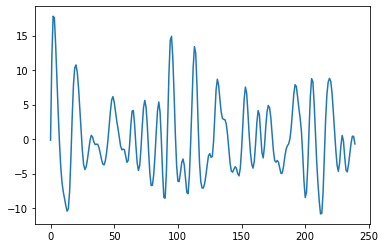

In [128]:
import matplotlib.pyplot as plt
# 하나 그리기
plt.plot(AIC_lt_mean)

##### 여러개 그리기

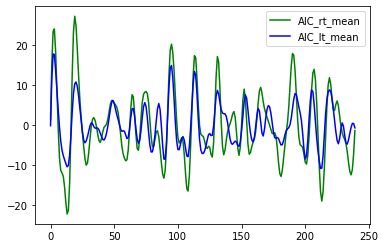

In [129]:
plt.plot(AIC_rt_mean, 'g', AIC_lt_mean, 'b')

plt.legend(('AIC_rt_mean','AIC_lt_mean'))

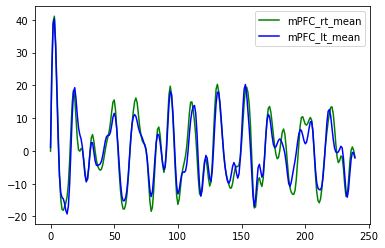

In [130]:
plt.plot(mPFC_rt_mean, 'g', mPFC_lt_mean, 'b')
plt.legend(('mPFC_rt_mean','mPFC_lt_mean'))

#### Dataframe 열추출
###### timepoint [13:119]은 loss task를 진행하였고, [126:232]은 reward task를 진행하였다.
###### 두 task에서의 차이를 보고 싶은데..

In [131]:
AIC_rt_loss = AIC_rt.T.loc[:,13:119]   # subject x time 형태로 보고 싶어서 transpose 시켜준다음 열 추출함.
AIC_lt_loss = AIC_lt.T.loc[:,13:119]   # 열 추출은 행추출 때와는 달리 앞에 :,를 더해줘야함.
AIC_rt_reward = AIC_rt.T.loc[:,126:232]
AIC_lt_reward = AIC_lt.T.loc[:,126:232]

mPFC_rt_loss = mPFC_rt.T.loc[:,13:119]
mPFC_lt_loss = mPFC_lt.T.loc[:,13:119]
mPFC_rt_reward = mPFC_rt.T.loc[:,126:232]
mPFC_lt_reward = mPFC_lt.T.loc[:,126:232]

In [132]:
AIC_rt_loss.shape

(57, 107)

In [133]:
AIC_rt_loss_mean = AIC_rt_loss.mean(axis=0)  # subject가 행에 가있으니까 평균도 행 값들에 대해서 계산해주기
AIC_lt_loss_mean = AIC_lt_loss.mean(axis=0)   
AIC_rt_reward_mean = AIC_rt_reward.mean(axis=0)
AIC_lt_reward_mean = AIC_lt_reward.mean(axis=0)

mPFC_rt_loss_mean = mPFC_rt_loss.mean(axis=0)
mPFC_lt_loss_mean = mPFC_lt_loss.mean(axis=0)
mPFC_rt_reward_mean = mPFC_rt_reward.mean(axis=0)
mPFC_lt_reward_mean = mPFC_lt_reward.mean(axis=0)

##### subplot으로 한 그림에 여러개 그래프 그리기 


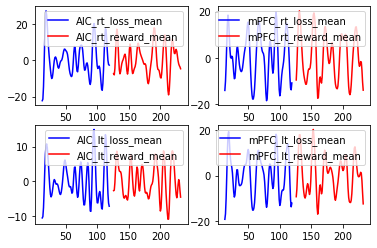

In [134]:
# 그래프 그리기
plt.subplot(2,2,1)  # 행 갯수, 열 갯수, 인덱스 => 2x2개를 그릴건데, 일단 1번째 칸에다 그리겠다.
plt.plot(AIC_rt_loss_mean, 'b', AIC_rt_reward_mean, 'r')
plt.legend(('AIC_rt_loss_mean','AIC_rt_reward_mean'))

plt.subplot(2,2,2)
plt.plot(mPFC_rt_loss_mean, 'b', mPFC_rt_reward_mean, 'r')
plt.legend(('mPFC_rt_loss_mean','mPFC_rt_reward_mean'))

plt.subplot(2,2,3) 
plt.plot(AIC_lt_loss_mean, 'b', AIC_lt_reward_mean, 'r')
plt.legend(('AIC_lt_loss_mean','AIC_lt_reward_mean'))

plt.subplot(2,2,4)
plt.plot(mPFC_lt_loss_mean, 'b', mPFC_lt_reward_mean, 'r')
plt.legend(('mPFC_lt_loss_mean','mPFC_lt_reward_mean'))

##### 시간 순서대로 그려졌다. 내가 원하는 그림이 아닌데..
###### plotting을 할 때 x축 값을 넣어주면 됨

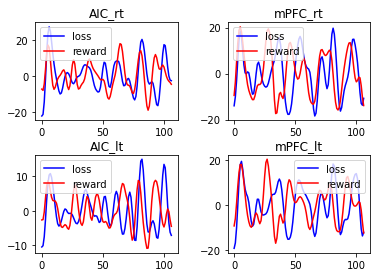

In [135]:
# 그래프 그리기
x = np.arange(0, len(AIC_rt_loss_mean))   ## == AIC_rt_loss_mean.shape[0]

plt.subplot(2,2,1)  # 행 갯수, 열 갯수, 인덱스 => 2x2개를 그릴건데, 일단 1번째 칸에다 그리겠다.
plt.plot(x,AIC_rt_loss_mean, 'b', x,AIC_rt_reward_mean, 'r')
plt.title('AIC_rt')
plt.legend(('loss','reward'))

plt.subplot(2,2,2)
plt.plot(x,mPFC_rt_loss_mean, 'b', x,mPFC_rt_reward_mean, 'r')
plt.title('mPFC_rt')
plt.legend(('loss','reward'))

plt.subplot(2,2,3) 
plt.plot(x,AIC_lt_loss_mean, 'b', x,AIC_lt_reward_mean, 'r')
plt.title('AIC_lt')
plt.legend(('loss','reward'))

plt.subplot(2,2,4)
plt.plot(x,mPFC_lt_loss_mean, 'b', x,mPFC_lt_reward_mean, 'r')
plt.title('mPFC_lt')
plt.legend(('loss','reward'))

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.35) # 제목을 쓰면서 위아래 plot이 겹치는 걸 해결하기 위해 추가함


###### plot만 봐서는 loss와 reward에서 bold signal의 차이가 있는지 잘 모르겠음
###### 통계를 통해 비교해야 함

###### 그림은 어쨌건 평균값으로만 비교를 한것이고, 실제 피험자 그룹의 loss 값과 reward 값에서 차이가 있는가를 비교하려면, Nsub 만큼의 
###### 비교 샘플이 있는 것. 대신 한 사람의 loss와 reward를 비교해야 하므로 paired t-test를 쓰면 좋을 것 같다. 
###### 일단은 한 사람에게서 각각 loss와 reward에 대해 각 ROI에서 얻은 signal을 평균해 보고 비교하려함

In [136]:
AIC_rt_loss_mean_personal = AIC_rt_loss.mean(axis=1)  # subject가 행에 가있으니까 이번엔 시간에 대한 값을 평균함
AIC_lt_loss_mean_personal = AIC_lt_loss.mean(axis=1)   
AIC_rt_reward_mean_personal = AIC_rt_reward.mean(axis=1)
AIC_lt_reward_mean_personal = AIC_lt_reward.mean(axis=1)

mPFC_rt_loss_mean_personal = mPFC_rt_loss.mean(axis=1)
mPFC_lt_loss_mean_personal = mPFC_lt_loss.mean(axis=1)
mPFC_rt_reward_mean_personal = mPFC_rt_reward.mean(axis=1)
mPFC_lt_reward_mean_personal = mPFC_lt_reward.mean(axis=1)

In [137]:
AIC_rt_loss_mean_personal.shape

(57,)

In [138]:
import scipy.stats as stats 

In [139]:
paired_AIC_lt = stats.ttest_rel(AIC_lt_loss_mean_personal, AIC_lt_reward_mean_personal)
print('AIC_lt : t = %.3f, pvalue = %.3f'%paired_AIC_lt)  
paired_AIC_rt = stats.ttest_rel(AIC_rt_loss_mean_personal, AIC_rt_reward_mean_personal)
print('AIC_rt : t = %.3f, pvalue = %.3f'%paired_AIC_rt) 
paired_mPFC_lt = stats.ttest_rel(mPFC_lt_loss_mean_personal, mPFC_lt_reward_mean_personal)
print('mPFC_lt : t = %.3f, pvalue = %.3f'%paired_mPFC_lt) 
paired_mPFC_rt = stats.ttest_rel(mPFC_rt_loss_mean_personal, mPFC_rt_reward_mean_personal)
print('mPFC_rt : t = %.3f, pvalue = %.3f'%paired_mPFC_rt) 

AIC_lt : t = -0.242, pvalue = 0.809
AIC_rt : t = 0.555, pvalue = 0.581
mPFC_lt : t = -0.585, pvalue = 0.561
mPFC_rt : t = -0.432, pvalue = 0.667


=> 유의수준(alpha)을 0.01이라하면 표본의 개수 n = 57 이므로 자유도는 n-1 = 56 -> (t0.005, 56) =2.4... -> 이 값보다 t 검정통계량 값이 커야 두 대응표본 간의 차이가 유의미한 것임. [pvalue = 2xP(T>t)]